# Ejercicio 1 (1 pt.)
Limpia el dataset de errores y elementos que no sean relevantes. Justifica en una cleda markdown las decisiones que has tomado.

En el dataset hay varios pacientes, cada uno de ellos han visitado el médico al menos 2 veces. Queremos construir un modelo que prediga el estado del paciente entre Demented, Nondemented y Converted. Con esto podremos identificar a tiempo sobre todo aquello pacientes a los que las pruebas diagnósticas iniciales indicaba que no eran dementes, pero que acabaron siéndolo.

In [20]:
# extraemos los datos del csv y vemos como se ven

import pandas as pd
import numpy as np

dataset = pd.read_csv('dementia_dataset.csv')

def transform_group(df):
  # Create three new columns with initial values of 0
  df['Nondemented'] = 0
  df['Demented'] = 0
  df['Converted'] = 0
  
  # Set the corresponding column to 1 based on the value in the "Group" column
  df.loc[df['Group'] == 'Nondemented', 'Nondemented'] = 1
  df.loc[df['Group'] == 'Demented', 'Demented'] = 1
  df.loc[df['Group'] == 'Converted', 'Converted'] = 1
  
  # Drop the original "Group" column
  df.drop('Group', axis=1, inplace=True)
  
  return df

def hand_to_binary(hand):
    if hand == 'R':
        return 1
    else:
        return 0
      
def male_to_binary(male):
  if male == 'M':
    return 1
  else:
    return 0

dataset['Hand'] = dataset['Hand'].apply(hand_to_binary)
dataset['M/F'] = dataset['M/F'].apply(male_to_binary)
dataset = transform_group(dataset)

new_dataset = dataset.drop(['MRI ID', 'EDUC'], axis=1)

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() ## Label encoder para las columnas que son strings
new_dataset['Subject ID'] = le.fit_transform(new_dataset['Subject ID'])

imputer = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='distance', metric='nan_euclidean')
values = imputer.fit_transform(new_dataset)

#Sum all the values of the dataset that are NaN
print(np.sum(np.isnan(new_dataset)))
print(dataset['Visit'].unique())

dataset_filled = pd.DataFrame(values, columns=new_dataset.columns)

from sklearn.model_selection import train_test_split

display(dataset_filled)

data_x = dataset_filled[['Subject ID', 'Visit', 'MR Delay', 'M/F', 'Hand', 'Age', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]
data_y = dataset_filled[['Nondemented', 'Demented', 'Converted']]

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

Subject ID      0
Visit           0
MR Delay        0
M/F             0
Hand            0
Age             0
SES            19
MMSE            2
CDR             0
eTIV            0
nWBV            0
ASF             0
Nondemented     0
Demented        0
Converted       0
dtype: int64
[1 2 3 4 5]


C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,Subject ID,Visit,MR Delay,M/F,Hand,Age,SES,MMSE,CDR,eTIV,nWBV,ASF,Nondemented,Demented,Converted
0,0.0,1.0,0.0,1.0,1.0,87.0,2.000000,27.0,0.0,1987.0,0.696,0.883,1.0,0.0,0.0
1,0.0,2.0,457.0,1.0,1.0,88.0,2.000000,30.0,0.0,2004.0,0.681,0.876,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,1.0,75.0,3.135793,23.0,0.5,1678.0,0.736,1.046,0.0,1.0,0.0
3,1.0,2.0,560.0,1.0,1.0,76.0,2.006997,28.0,0.5,1738.0,0.713,1.010,0.0,1.0,0.0
4,1.0,3.0,1895.0,1.0,1.0,80.0,1.980747,22.0,0.5,1698.0,0.701,1.034,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,148.0,2.0,842.0,1.0,1.0,82.0,1.000000,28.0,0.5,1693.0,0.694,1.037,0.0,1.0,0.0
369,148.0,3.0,2297.0,1.0,1.0,86.0,1.000000,26.0,0.5,1688.0,0.675,1.040,0.0,1.0,0.0
370,149.0,1.0,0.0,0.0,1.0,61.0,2.000000,30.0,0.0,1319.0,0.801,1.331,1.0,0.0,0.0
371,149.0,2.0,763.0,0.0,1.0,63.0,2.000000,30.0,0.0,1327.0,0.796,1.323,1.0,0.0,0.0


#### Cleaning the data

Se han transformado las categorias Group, M/F y Hand para que sean valores binarios.

Seguido de esto se ha eliminado del dataset la columna EDUC ya que no se menciona que sea relevante en el enunciadio. Tambien se ha quitado MRI ID ya que se opina que el numero de identificacion de visita al medico no es relevante para saber si un paciente tiene demencia o no.

Tambien se ha usado el LabelEncoder para transformar las celdas alphanumericas en numeros y que asi no hubiese problema de formato.

Por ultimo se ha visto que columnas contenian valores NaN y se ha ha usado SimpleImputer usando la media para inferir los datos que faltaban en SES y MMSE.

# Ejercicio 2 (1.5 pt.)

Usa el Perceptron multicapa de SKlearn. El resutlado minimo a conseguir debe ser una precision del 65%

##### Observaciones

Hay que escalar los datos para que te de unos resultados decentes. 

In [12]:
## Multi-layer Perceptron

from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

# Normalizamos los datos ya que MLP es sensible a la escala de los datos
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000, alpha=0.0001, solver='adam', verbose=10, random_state=42, tol=0.000000001)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(y_pred)
print(np.array(y_test))

print(clf.score(x_test, y_test))


Iteration 1, loss = 2.10551050
Iteration 2, loss = 1.94019128
Iteration 3, loss = 1.79763658
Iteration 4, loss = 1.67111365
Iteration 5, loss = 1.55261047
Iteration 6, loss = 1.44633048
Iteration 7, loss = 1.35114683
Iteration 8, loss = 1.26157251
Iteration 9, loss = 1.17884768
Iteration 10, loss = 1.09700082
Iteration 11, loss = 1.01973367
Iteration 12, loss = 0.94362753
Iteration 13, loss = 0.87260097
Iteration 14, loss = 0.80513800
Iteration 15, loss = 0.74391910
Iteration 16, loss = 0.68907668
Iteration 17, loss = 0.63990392
Iteration 18, loss = 0.59964194
Iteration 19, loss = 0.56277535
Iteration 20, loss = 0.53199327
Iteration 21, loss = 0.50633366
Iteration 22, loss = 0.48331458
Iteration 23, loss = 0.46473726
Iteration 24, loss = 0.44670029
Iteration 25, loss = 0.43145547
Iteration 26, loss = 0.41854317
Iteration 27, loss = 0.40511089
Iteration 28, loss = 0.39351176
Iteration 29, loss = 0.38236863
Iteration 30, loss = 0.37202119
Iteration 31, loss = 0.36198795
Iteration 32, los

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


# Ejercicio 3 (1.5 pt.)

Usa el algoritmo Decision Tree de Sklearn para construir un segundo modelo. Calcula accuracy y la matriz de confusión. El resultado mínimo que debéis conseguir de precisión es de un 85% (random_state=42)

- Ventajas
    - El entrenamiento es muy rapido
    - Es facil interpretar resultados por humano, alg caja blanca
    - Para algunos problemas consigue buena precision
    - Se pueden convertir facilmente en reglas
    - Preparacion de datos poco exigente
    - Puede trabaja con variable cuantitativas y cualitativas
- Desventajas
    - Muy dependiente al ruido de la entrada
    - los arboles de decision tienden al sobre-entrenamiento
    - No se puede garantizar que el arbol generado sea optimo
    - Se recomuendo balancear el conjunto de datos antes de entrenar
    - Si no hay una aproximacion lineal al problea puede que den un modelo muy malo poco efectivo


##### Observaciones

0.8533333333333334


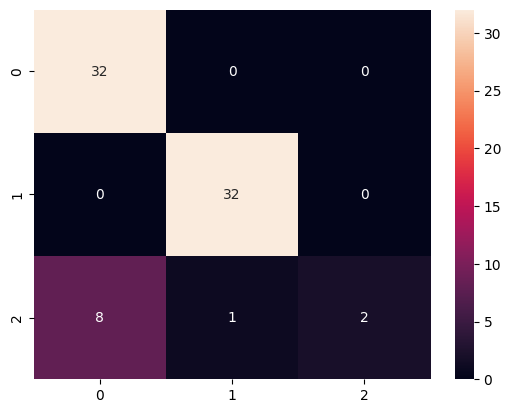

In [13]:
## Decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

deicison_tree = DecisionTreeClassifier(random_state=42, max_depth=10)

decision_tree = deicison_tree.fit(x_train, y_train)
# Para mostrar el arbol de forma mas "humana"
# r = export_text(decision_tree, feature_names=['Subject ID', 'Visit', 'MR Delay', 'M/F', 'Hand', 'Age', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'])
# print(r)

print(decision_tree.score(x_test, y_test))

# Confusion matrix: 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

## Ejemplos de otras cosas

### KNN
- Ventajas
    - No hace suposiciones explicitas sobre la forma de funcionar de los datos evitando los peligros de la distribucion subyacente de los datos
    - Algoritmo simple de explicar e iterpretar
    - Alta precision (relativa)
    - Proceso de entrenamiento inmediato

- Desventajas
    - Muy sensible a los atributos irrelevantes
    - Sensible al ruido
    - Ejecucion lenta si existen muchos datos de entrenamiento
    - Es caro en memoria si hay mucho casos

In [14]:
## KNN 
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10) 

model.fit(x_train, y_train)
prediction = model.predict(x_test)

#print("Prediction")
#print(prediction)
#print("Test")
#print(np.array(y_test))

print(model.score(x_test, y_test))

0.7466666666666667


### Support Vector Machine (SVM)
- Ventajas
    - Efectivo en espacios de alta dimension
    - Efectivo en casos donde el numero de dimensiones es mayor que el numero de muestras
    - Utiliza un subconjunto de puntos de entrenamiento en la funcion de decision por lo que tambien es eficiente en memoria
    - Verstail, ya que se pueden usar diferentes funciones del nucleo para la funcion de decision

- Desventajas
    - Si el número de características es mucho mayor que el número de
muestras evite el exceso de ajuste al elegir las funciones del Kernel
y el término de regularización es crucial
    - Los SVMs no proporcionan directamente estimaciones de
probabilidad, éstas se calculan utilizando una validación cruzada.

In [15]:
## SVM (Support Vector Machine)

from sklearn.svm import SVC

classifier = SVC(kernel='linear', random_state=0)

classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print(classifier.score(x_test, y_test))



ValueError: y should be a 1d array, got an array of shape (298, 3) instead.